<a href="https://colab.research.google.com/github/muratgguzel/AIML-DeepNN_Project7-BankChurnPrediction/blob/main/Murat_Goksenin_Guzel_Project7_v2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))



Thu Jun 15 21:10:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')
! pwd

You are using a high-RAM runtime!
/content


In [4]:
#%%shell
#jupyter nbconvert --to html ///content/Dec22_Murat_Goksenin_Guzel_Project7_v1_1.ipynb

# Bank Churn Prediction Problem Statement


### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider.

It is important to understand which aspects of the service influence a customer's decision in this regard.

Management can concentrate efforts on the improvement of service, keeping in mind these priorities.







### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Dictionary
`CustomerId`: Unique ID which is assigned to each customer

`Surname`: Last name of the customer

`CreditScore`: It defines the credit history of the customer.

`Geography`: A customer’s location

`Gender`: It defines the Gender of the customer

`Age`: Age of the customer

`Tenure`: Number of years for which the customer has been with the bank

`NumOfProducts`: It refers to the number of products that a customer has
purchased through the bank.

`Balance`: Account balance

`HasCrCard`: It is a categorical variable that decides whether the customer has a credit card or not.

`EstimatedSalary`: Estimated salary

`isActiveMember`: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

`Exited`: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values

                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )


## 1-LOADING LIBRARIES

In [5]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
import sklearn
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
import tensorflow as tf

##2-LOADING AND EXPLORING DATA

- Loading Data Form CSV

In [8]:
Row_Data = pd.read_csv("https://raw.githubusercontent.com/muratgguzel/AIML-DeepNN_Project7-BankChurnPrediction/main/Churn.csv")

- Copying row data for working

In [9]:
# copying data to another variable to avoid any changes to original data
data = Row_Data.copy()

 View the first and last 5 rows of the dataset.

In [10]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Understand the shape of the dataset.

In [11]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


The dataset has 10000 rows and 14 columns

 - Check data format

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data set consist of integer values

Check any null data exits

In [13]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    10000
dtype: int64

In [15]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

No missing data exits in data set

Check for Dublicated Data

In [16]:
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No duplicated data exits

In [17]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**2.1** **Observations About Data**

In [18]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


The dataset has `10000` rows and `14` columns exits

No missing data exits on data set

No duplicated data exits on data set





**2.2** **Statistical Observations**

`CreditScore`: %50 percent or less having credit score of 652

`Age`: %75 of customers younger than 44 and %50 are younger than 32

`Tenure`: %50 or less has 5 years tenure

`Balance`: %50 of customers have less than 97198 balance at bank and %25 has no balance on bank

`NumOfProducts`: %50 percent or less having 1 product

HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.

`EstimatedSalary`: Maximum Salary is nearly 200000 and %50 having 100193 or less

In [19]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Print data values generalization behaviour

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##3-EXPLOTARY DATA ANALYSIS

Define Categorical Columns vrs Numerical Columns for EDA Analyzes

In [21]:
numerical_cols = [
    "Geography",
    "Gender",
    "HasCrCard",
    "IsActiveMember",
    "Exited",
    ]

- For EDA analyzes data_EDA dataframe is forming

In [22]:
data_EDA=data.copy()

**3.1** **UNIVARITY ANALYZES**

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data:    dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**3.1.1** **CHECKING Credit Score**

In [24]:
data_EDA.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


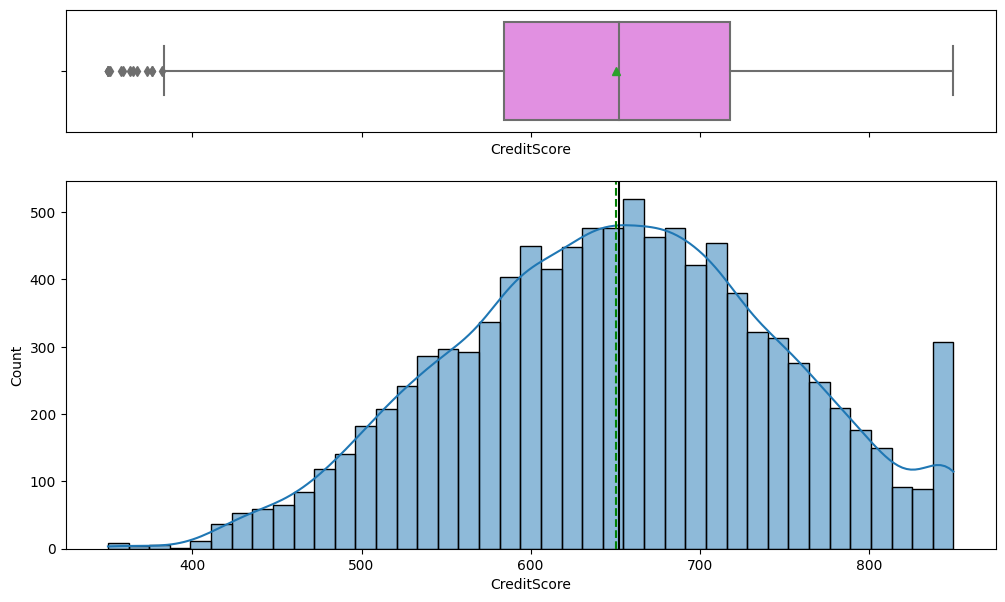

In [25]:
histogram_boxplot(data_EDA,"CreditScore",kde=True)

In [26]:
data_EDA["CreditScore"].median()


652.0

In [27]:
data_EDA["CreditScore"].mean()

650.5288

- Credit scored is left skewed and has outliers with having Mean: 650.5288 and Median: 652

**3.1.2** **CHECKING Balance**

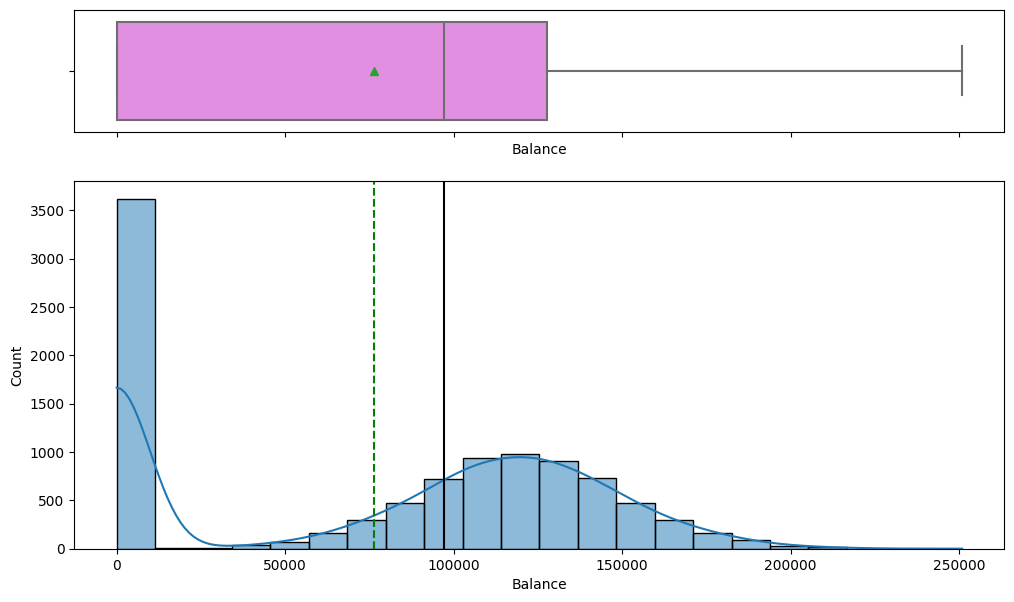

In [28]:
histogram_boxplot(data_EDA,"Balance",kde=True)

Balance shows right skeded distribution having mean=76485 and median=97198




In [29]:
data_EDA["Balance"].mean()

76485.889288

In [30]:
data_EDA["Balance"].median()

97198.54000000001

**3.1.3** **CHECKING Tenure**

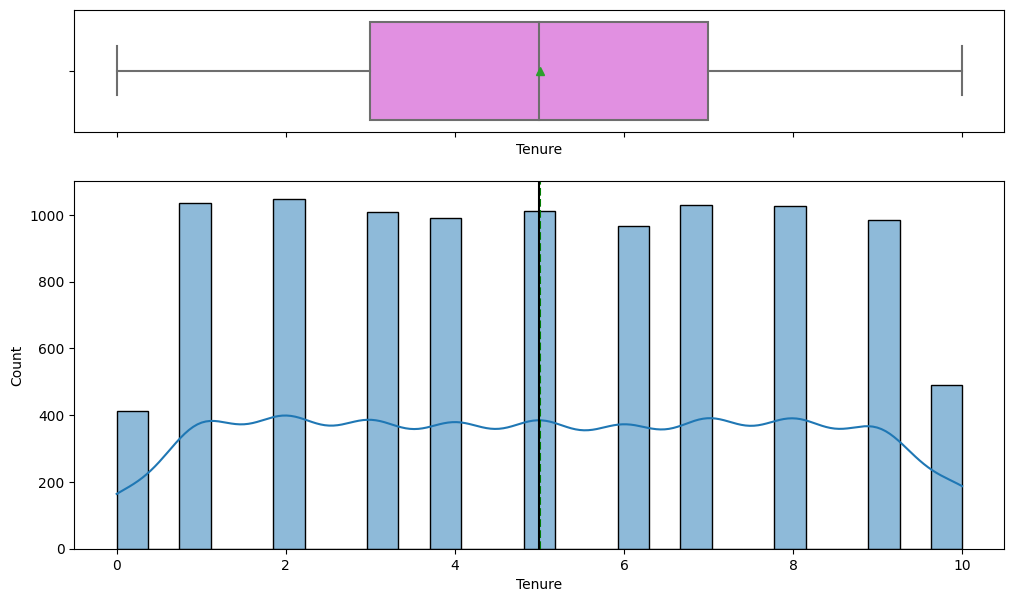

In [31]:
histogram_boxplot(data_EDA,"Tenure",kde=True)

Tenure mean and median is nearly same and having value of 5

In [32]:
data_EDA["Tenure"].mean()

5.0128

In [33]:
data_EDA["Tenure"].median()

5.0

**3.1.4** **CHECKING Estimated Salary**

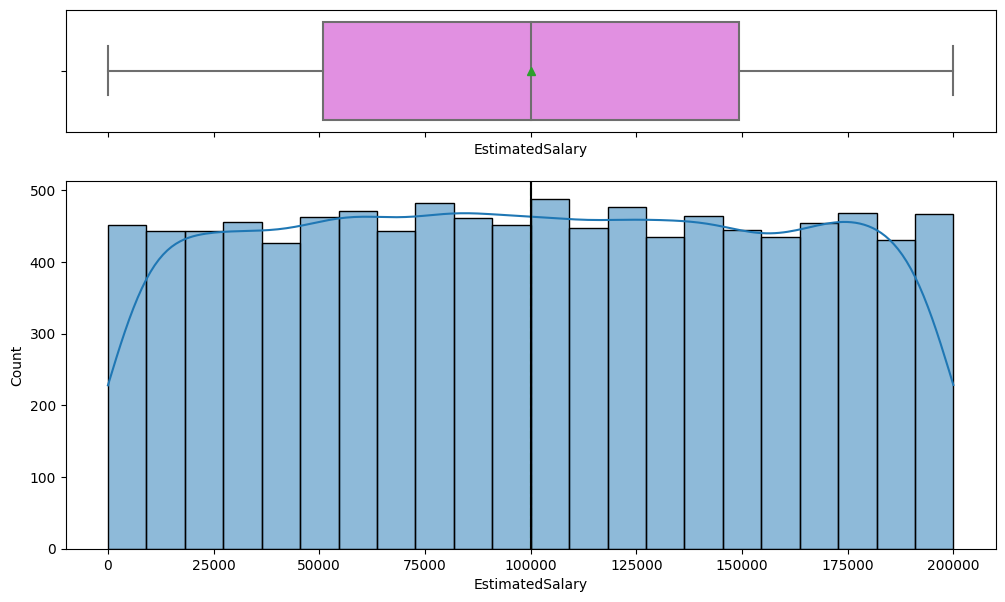

In [34]:
histogram_boxplot(data_EDA,"EstimatedSalary",kde=True)

In [35]:
data_EDA["EstimatedSalary"].mean()

100090.239881

In [36]:
data_EDA["EstimatedSalary"].median()

100193.915

Mean and Median of estimated salary is close to each other and having no outliers.

**3.1.5** **CHECKING Number of Products**

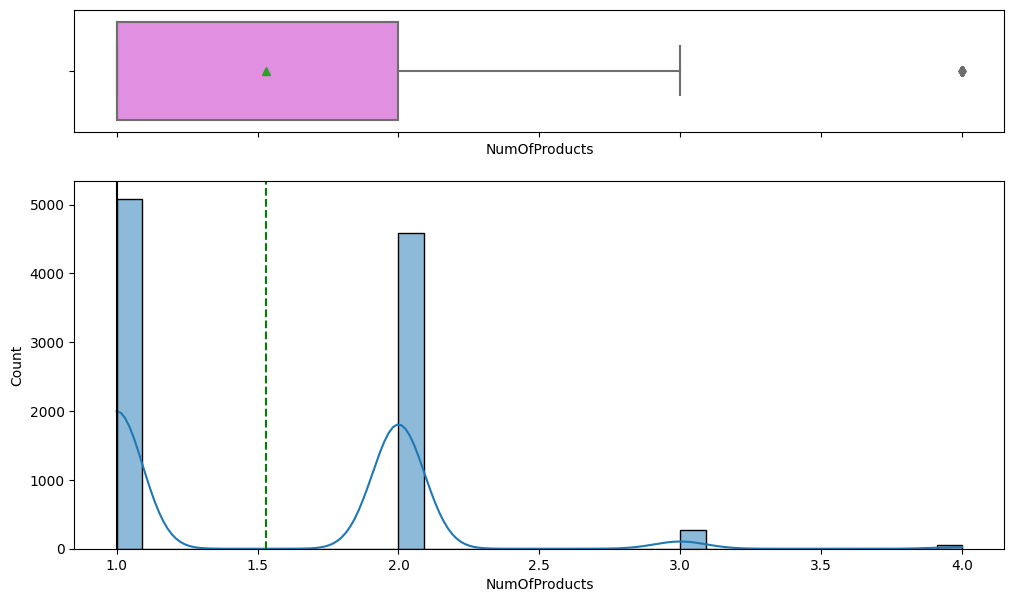

In [37]:
histogram_boxplot(data_EDA,"NumOfProducts",kde=True)

Having outliers , having mean=1.5 and median=1

In [38]:
data_EDA["NumOfProducts"].mean()

1.5302

In [39]:
data_EDA["NumOfProducts"].median()

1.0

In [40]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**3.2** **BIVARIATE ANALYSIS**

In [41]:
data_EDA.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dropping Customer ID as no need for EDA analyzes

In [42]:
data_EDA = data_EDA.drop(["RowNumber"], axis=1)

In [43]:
data_EDA = data_EDA.drop(["Surname"], axis=1)

In [44]:
data_EDA = data_EDA.drop(["CustomerId"], axis=1)

In [45]:
data_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


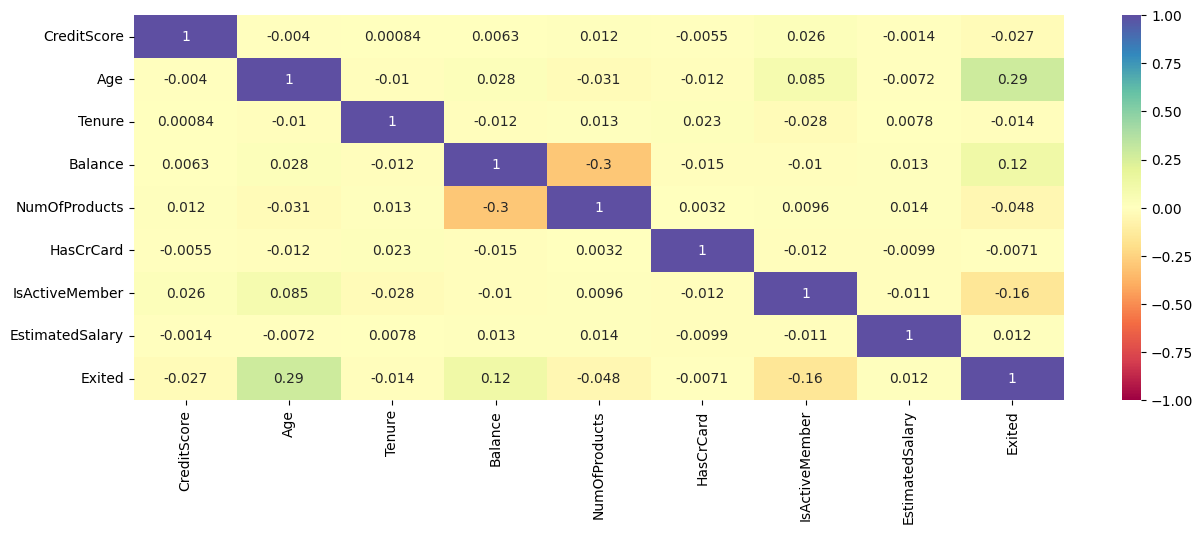

In [46]:
plt.figure(figsize=(15,5))
sns.heatmap(data_EDA.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**OBSERVATIONS**



*`Exited` has a `POSITIVE` Correlation with `Age` , older people thinks to leave more tha younger people.

*`Exited` has a `POSITIVE` Correlation with `Balance`,this means that customers having increased balance exited more.

*`Exited` has a `NEGATIVE` Correlation with `IsActiveMember`,this means that customers who uses bank product more regulary has some loyalty to bank.

*`Exited` has a `NEGATIVE` Correlation with `Tenure`,this means that customer enggament year negatively impacating Exited ratio

*`Credit Score` has a `POSITIVE` Correlation with `Balance`,this means that people whose balance is high probably may have higher credit score

*`Credit Score` has a `POSITIVE` Correlation with `IsActiveMember`,this means that customers who has good score are generally stable customers

*`NumOfProducts` has a `POSITIVE` Correlation with `Tenure`,this means that customers gaining more products when they engage more years with bank

*`NumOfProducts` has a `POSITIVE` Correlation with `Estimated Salary`,this means that when salary increases customers may prefer to get more products















**Differentiating Numerical Columns**

In [47]:
data_EDA["IsActiveMember"]=data_EDA["IsActiveMember"].astype("category")

In [48]:
data_EDA["HasCrCard "]=data_EDA["HasCrCard"].astype("category")

In [49]:
data_EDA["Exited"]=data_EDA["Exited"].astype("category")

In [50]:
numeric_cols = data_EDA.select_dtypes(include=[np.number]).columns

print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'EstimatedSalary'],
      dtype='object')


**All Numerical Columns Analyzsis**

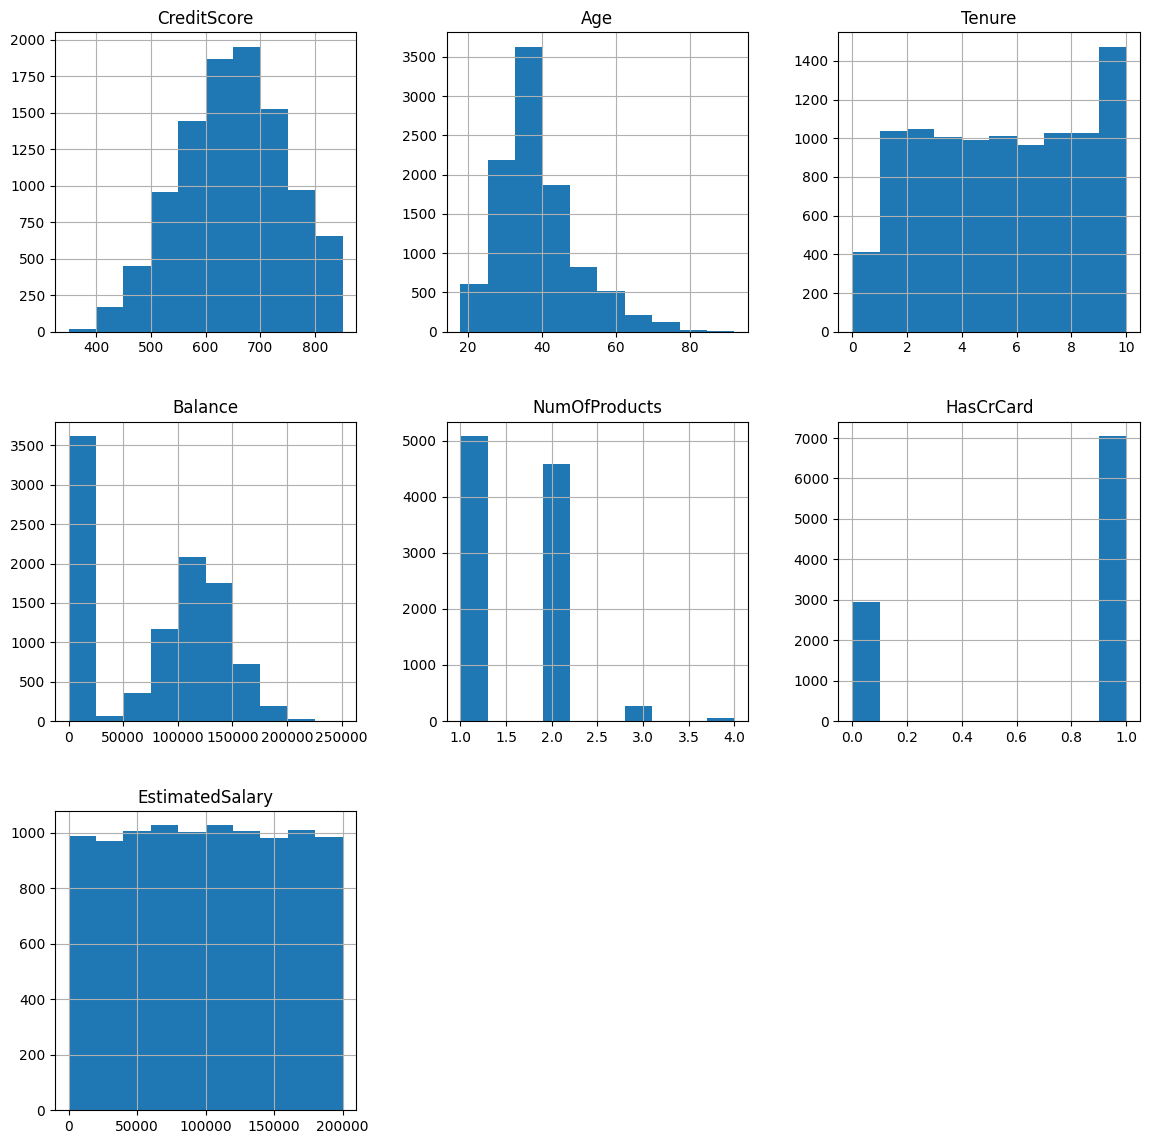

In [51]:
data_EDA[numeric_cols].hist(figsize=(14, 14))
plt.show()

In [52]:
data_EDA.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasCrCard
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [53]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Age Versus Tenure**

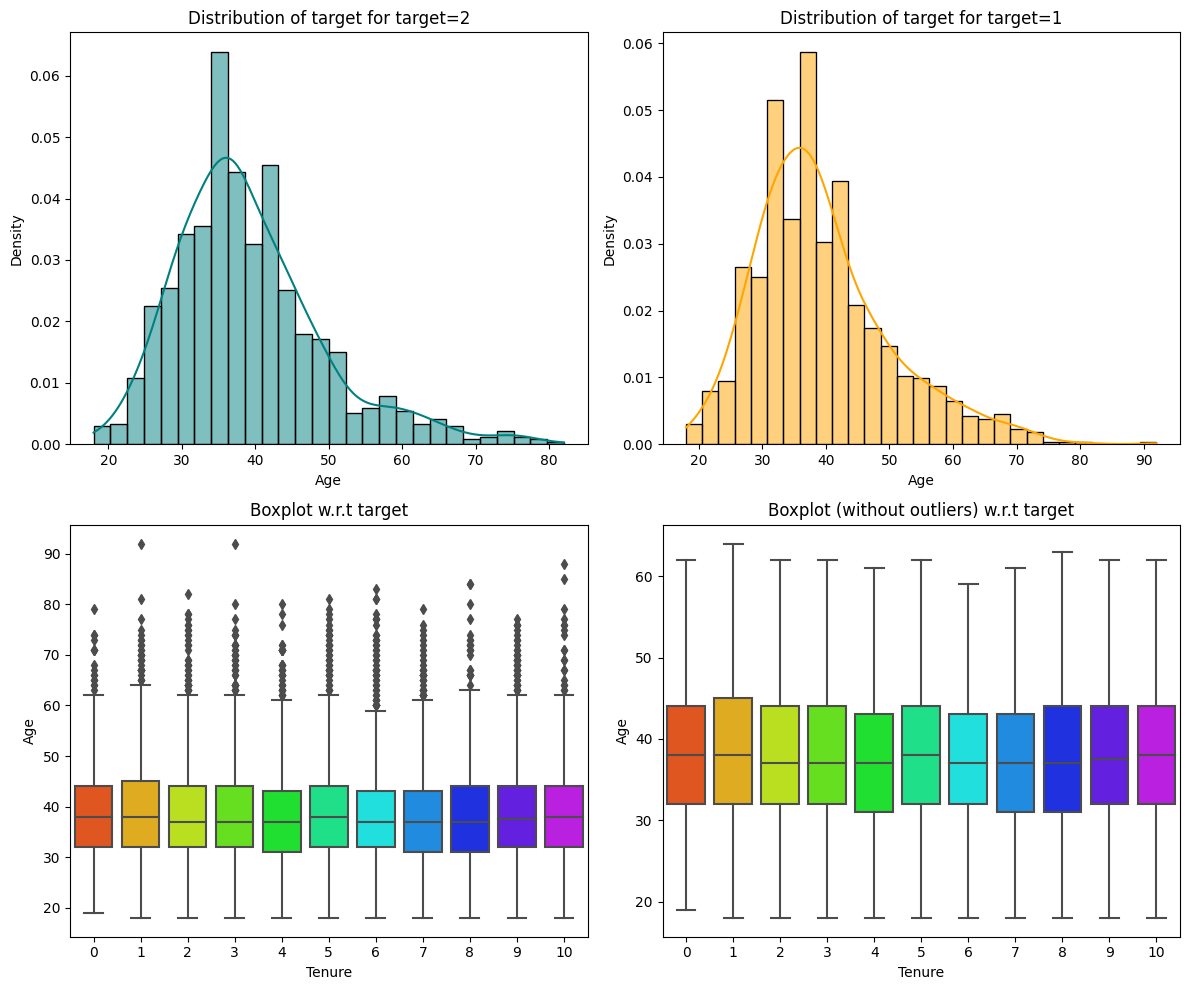

In [54]:
distribution_plot_wrt_target(data_EDA, "Age", "Tenure")

Tenure has outliers generally after 60 years old , but generally changes between age 30-50

**Total Credit Cards Versus Total Visits To Bank**

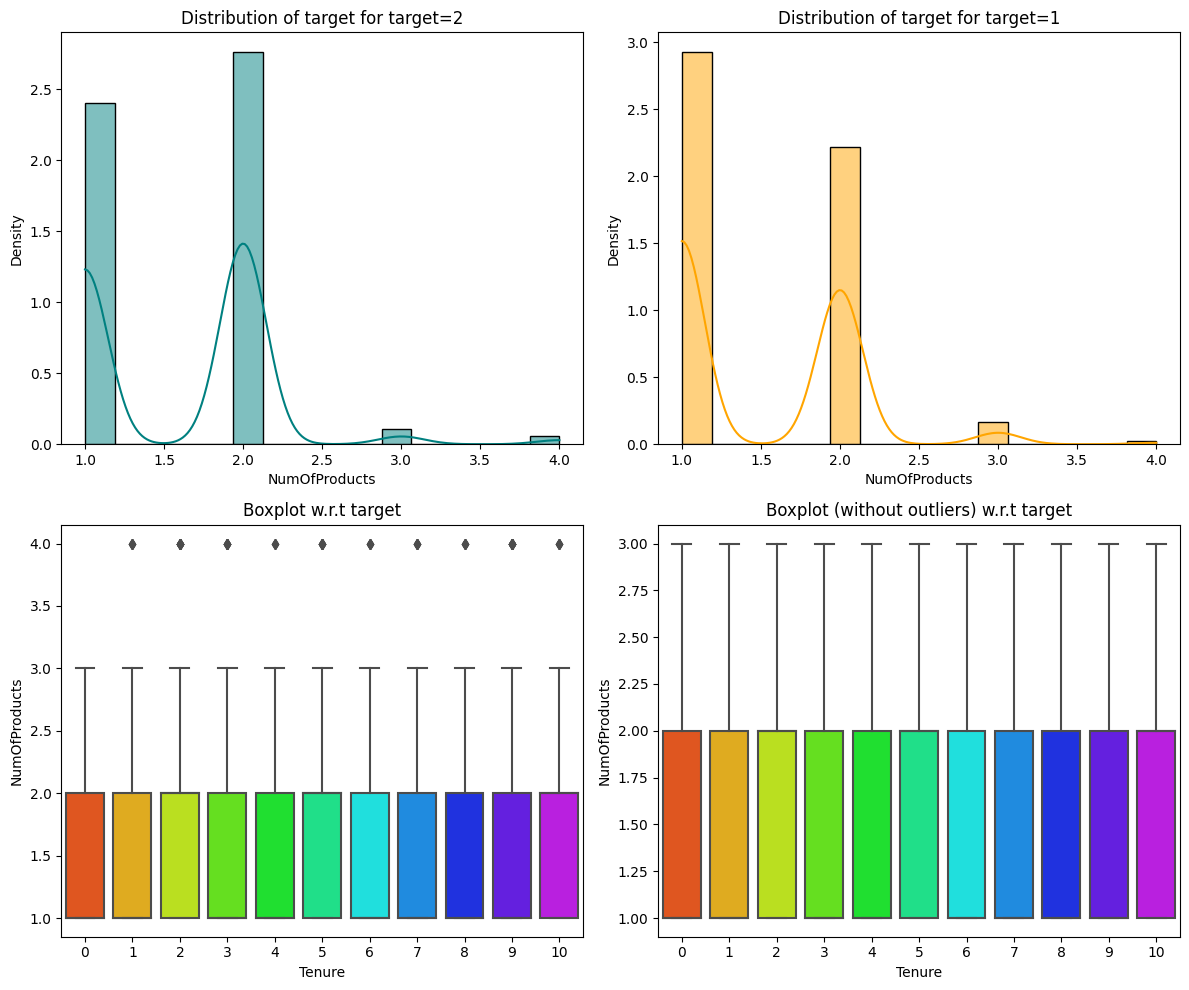

In [55]:
distribution_plot_wrt_target(data_EDA, "NumOfProducts", "Tenure")

Number of products may have outliers when tenure increases


In [56]:
#num_col = data_EDA.select_dtypes(include=np.number).columns.tolist()
#for item in num_col:
#    labeled_barplot(data_EDA, item, perc=True)

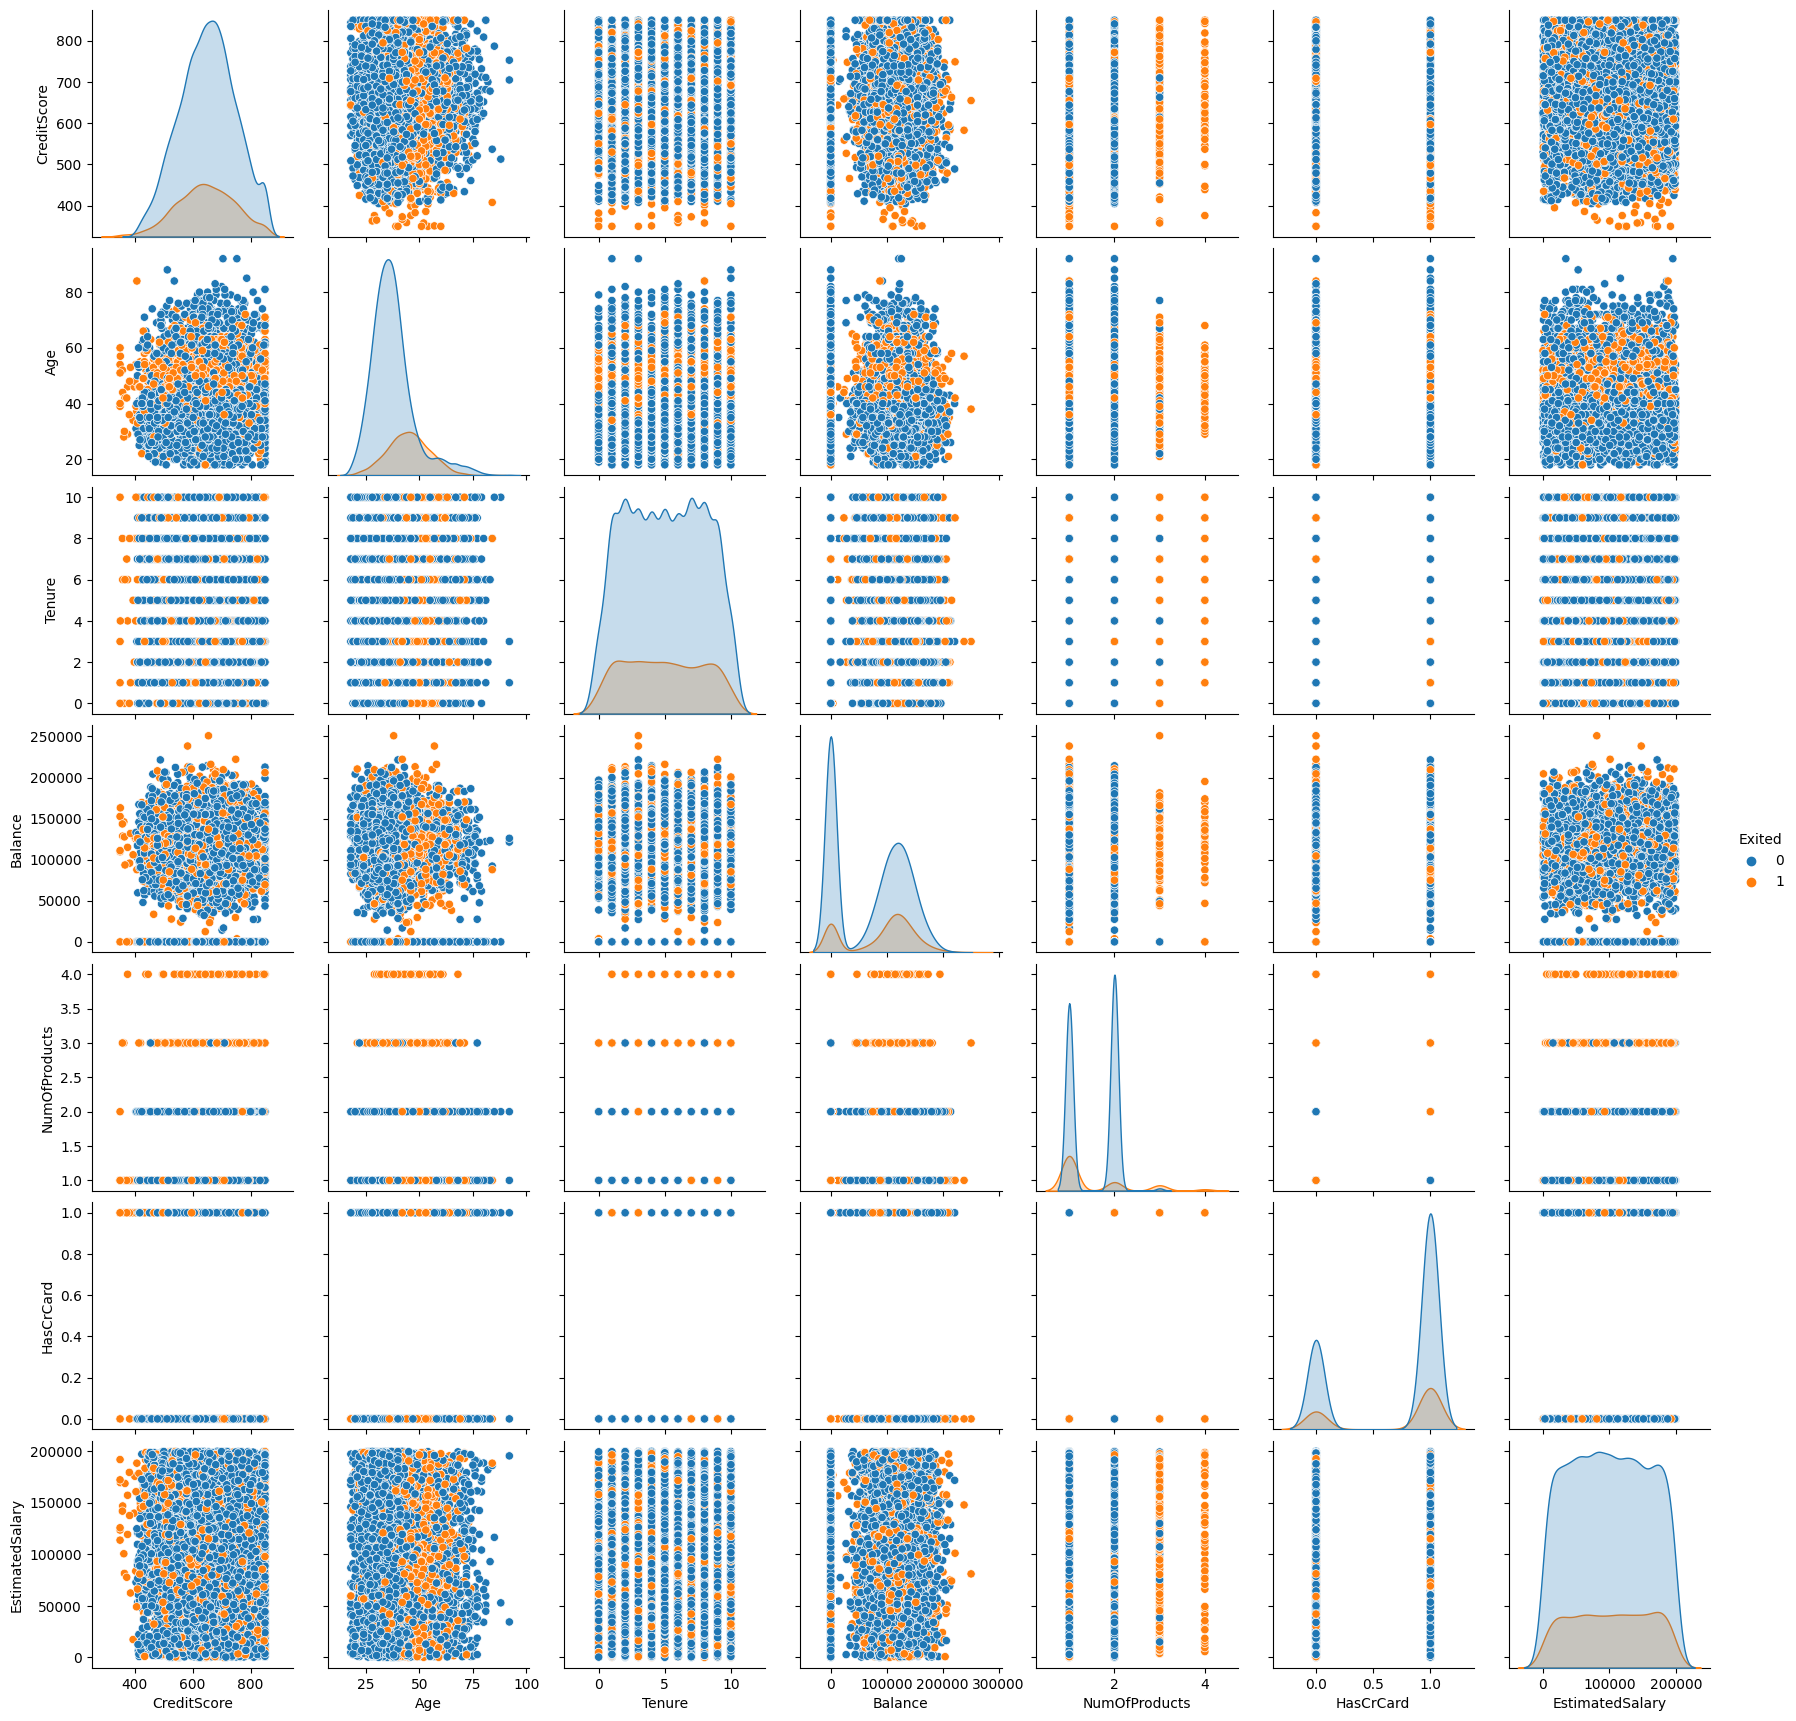

In [57]:
sns.pairplot(data=data_EDA,hue="Exited", diag_kind="kde")
plt.show()

In [58]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [59]:
data_EDA.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasCrCard
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


**Ditribution Of Age**

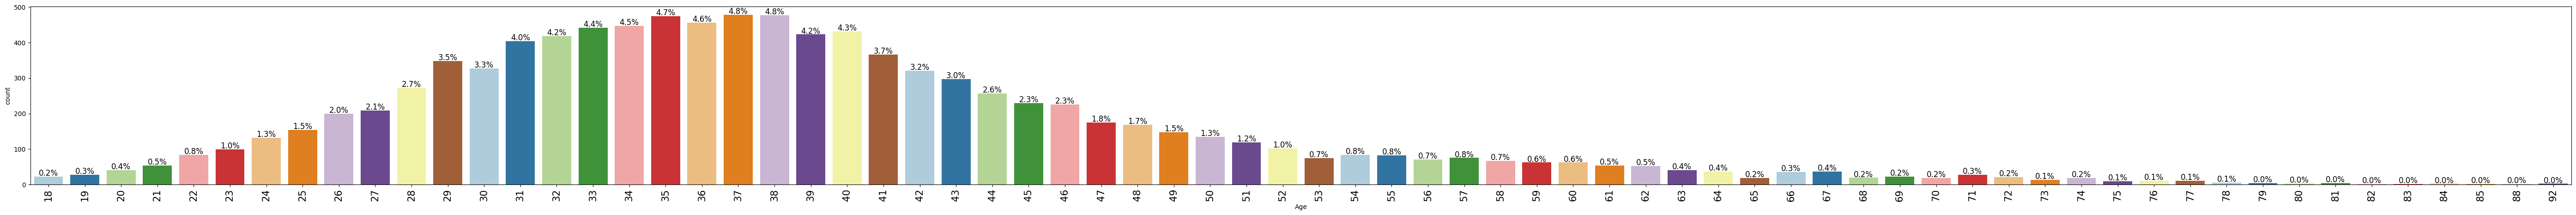

In [60]:
labeled_barplot(data_EDA, "Age", perc=True)

%23.9 of customers visits bank and is the highest frequency group

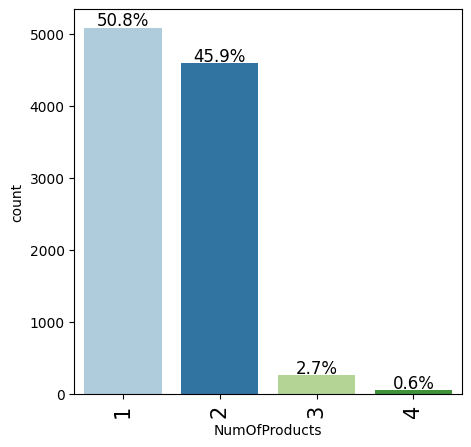

In [61]:
labeled_barplot(data_EDA, "NumOfProducts", perc=True)

%28.6 percentage of group visits 2 times with having highest frequencey

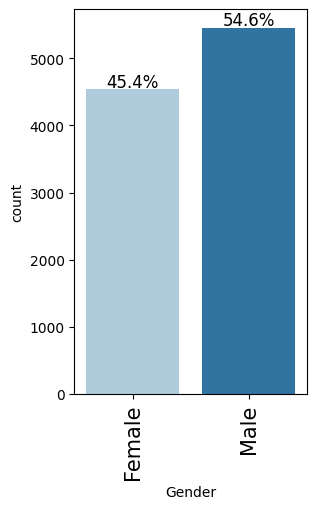

In [62]:
labeled_barplot(data_EDA, "Gender", perc=True)

In [63]:
#print(Data.Target.value_counts())
#labels = 'Looking for job change', 'Not Looking for job change'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
#sizes = [Data.Target[Data['Target']==1].count(),Data.Target[Data['Target']==0].count()]
#explode = (0, 0.1)
#fig1, ax1 = plt.subplots(figsize=(10, 8))
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
#ax1.axis('equal')
#plt.title("Proportion", size = 20)
#plt.show()

##4-DATA PREPROSESSING

In [64]:
data_preprocess=data_EDA.copy()

4.1 **Imputing Missing Values :**

No missing values exits at data set

4.2 **Splitting Data Set Into Train and Test**

In [65]:
data_preprocess

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasCrCard
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [66]:
X = data_preprocess.drop('Exited',axis=1)
Y = data_preprocess['Exited']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1,stratify = Y)

In [68]:
print(X_train.shape,X_test.shape)

(8000, 11) (2000, 11)


In [69]:
print("Exited value ratio in y")
print(Y.value_counts(1))
print("*" * 80)
print("Exited value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Exited value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Exited value ratio in y
0    0.7963
1    0.2037
Name: Exited, dtype: float64
********************************************************************************
Exited value ratio in y_train
0    0.79625
1    0.20375
Name: Exited, dtype: float64
********************************************************************************
Exited value ratio in y_test
0    0.7965
1    0.2035
Name: Exited, dtype: float64
********************************************************************************


4.3 **Fixing Outliers In Training and Test Data Set**

In [70]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

4.4 Fixing Outliers on Training Data Set

In [71]:
numerical_col=X_train.select_dtypes(include=np.number).columns.tolist()

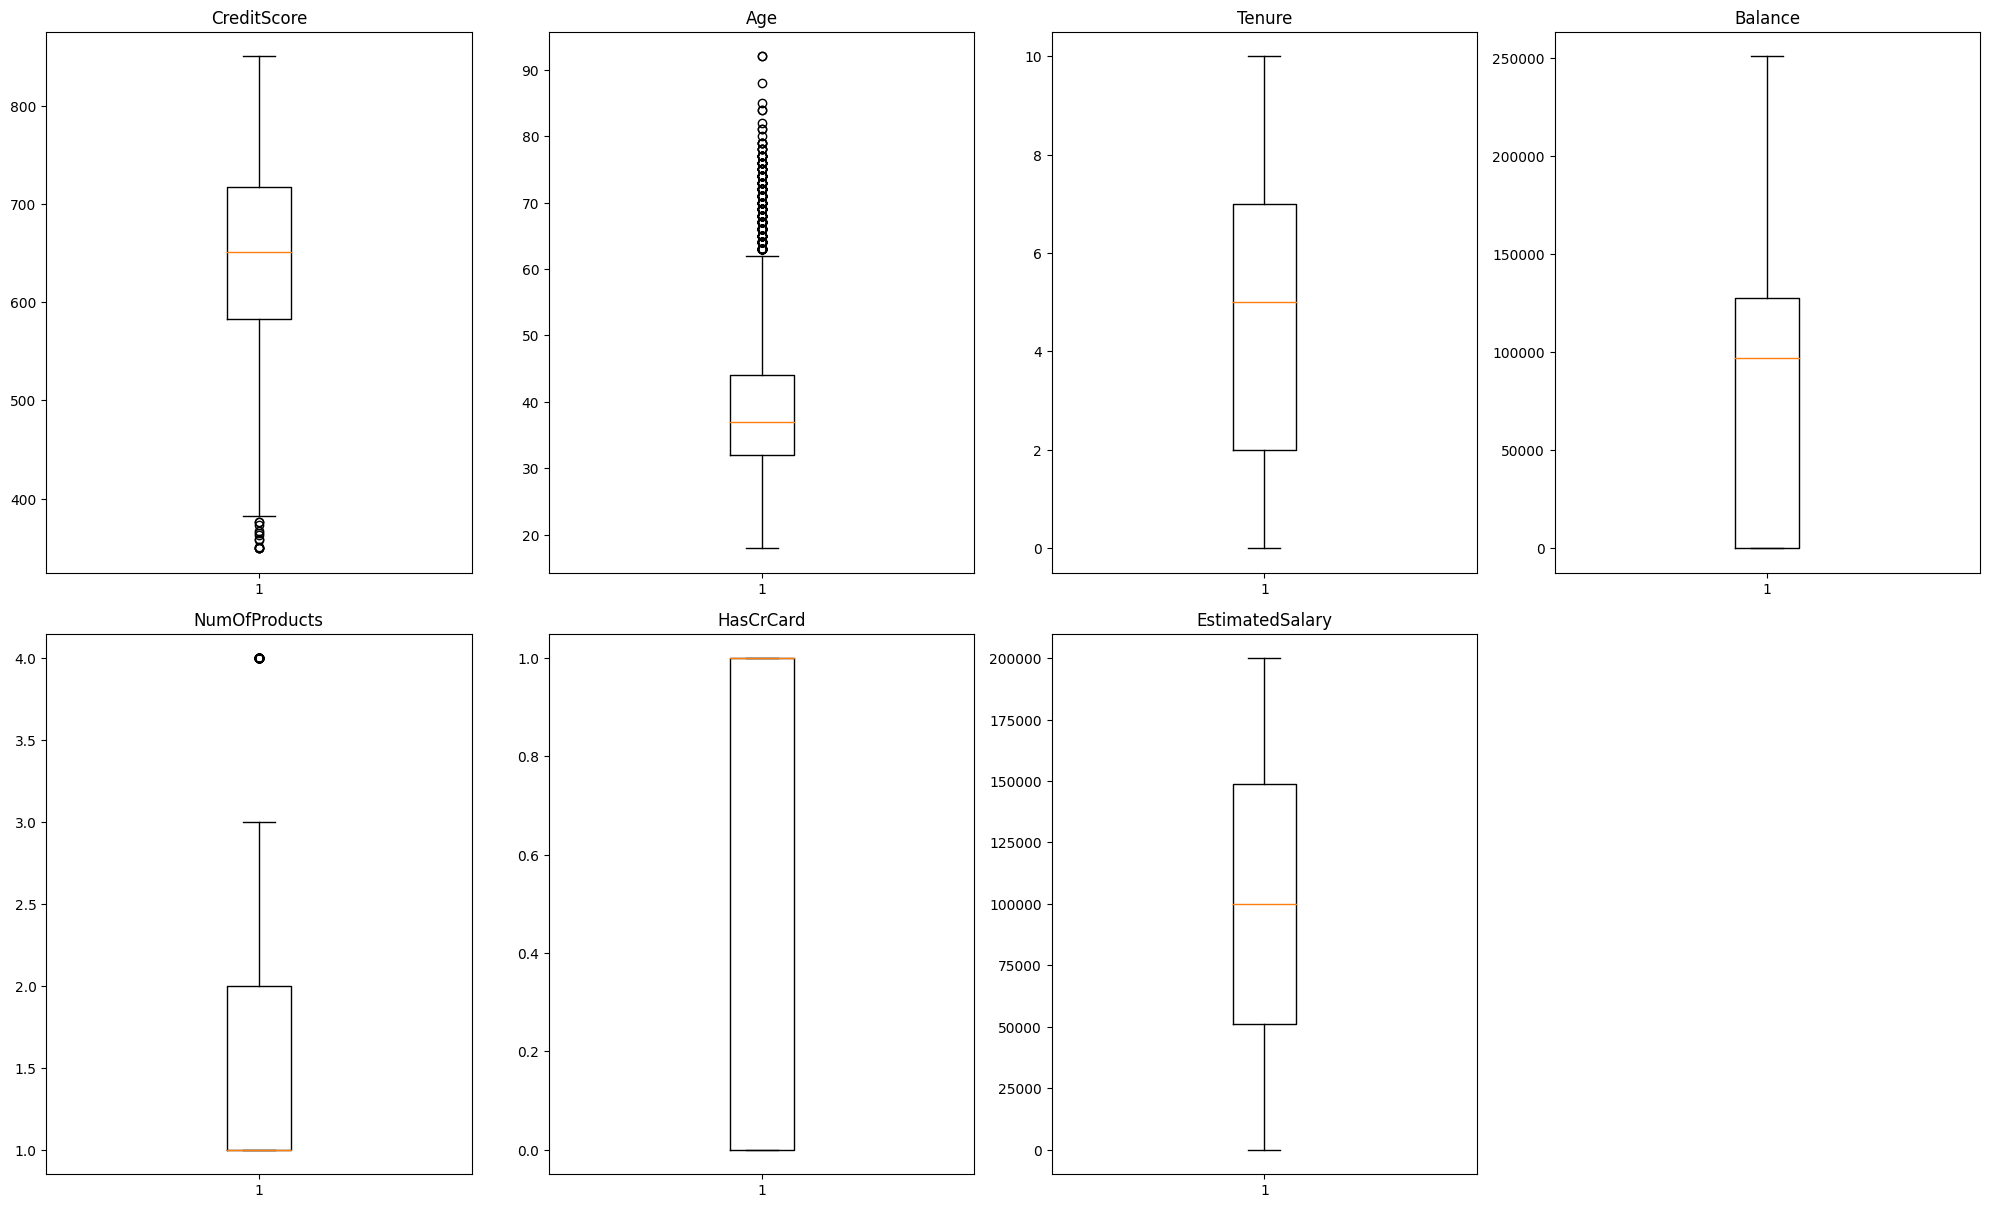

In [72]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

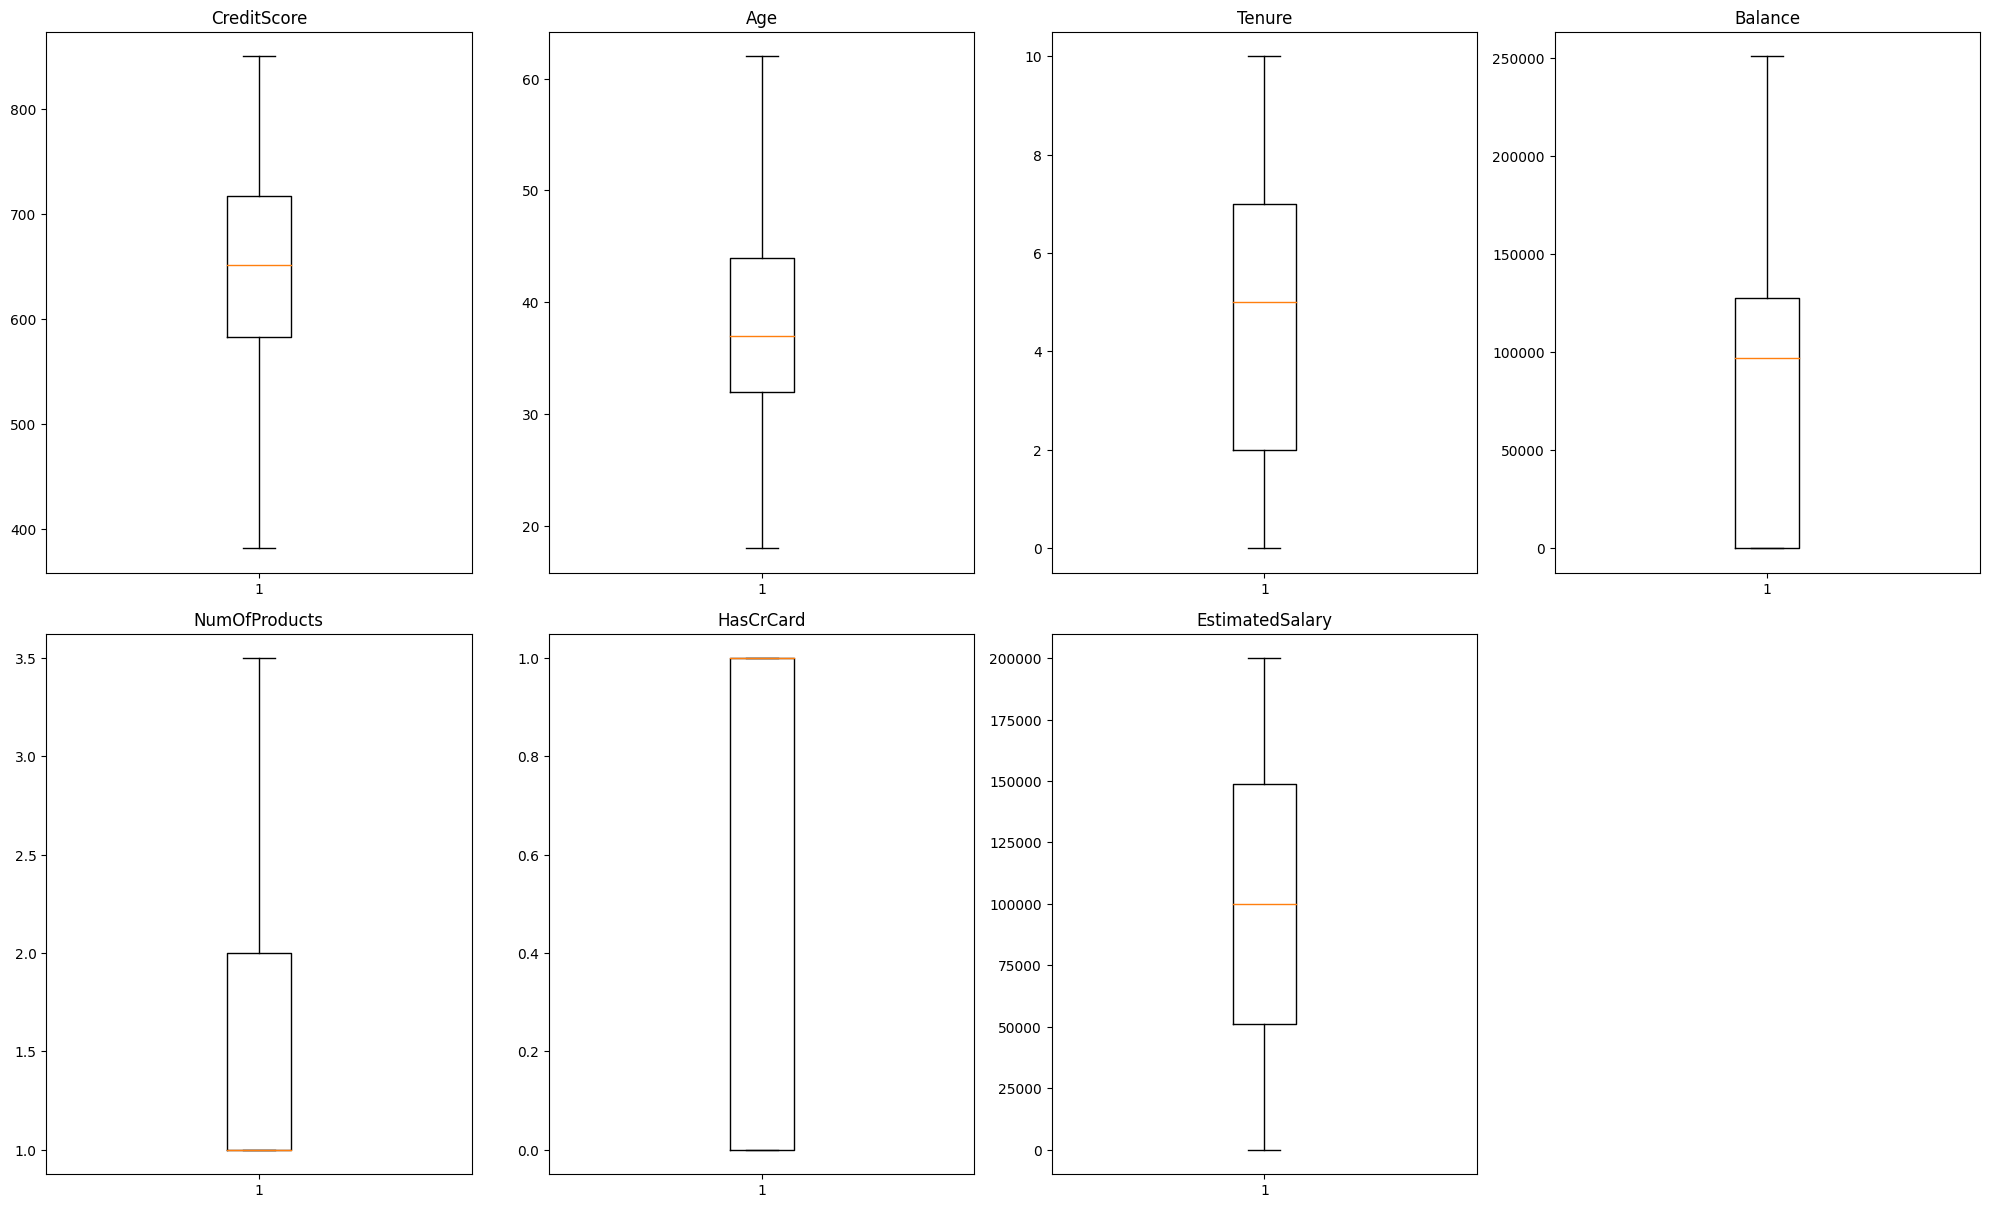

In [73]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
X_val = treat_outliers_all(X_train, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_val[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers Fixed on Training Data Set

4.5 Fixing Outliers on Test Data Set

In [74]:
numerical_col=X_test.select_dtypes(include=np.number).columns.tolist()

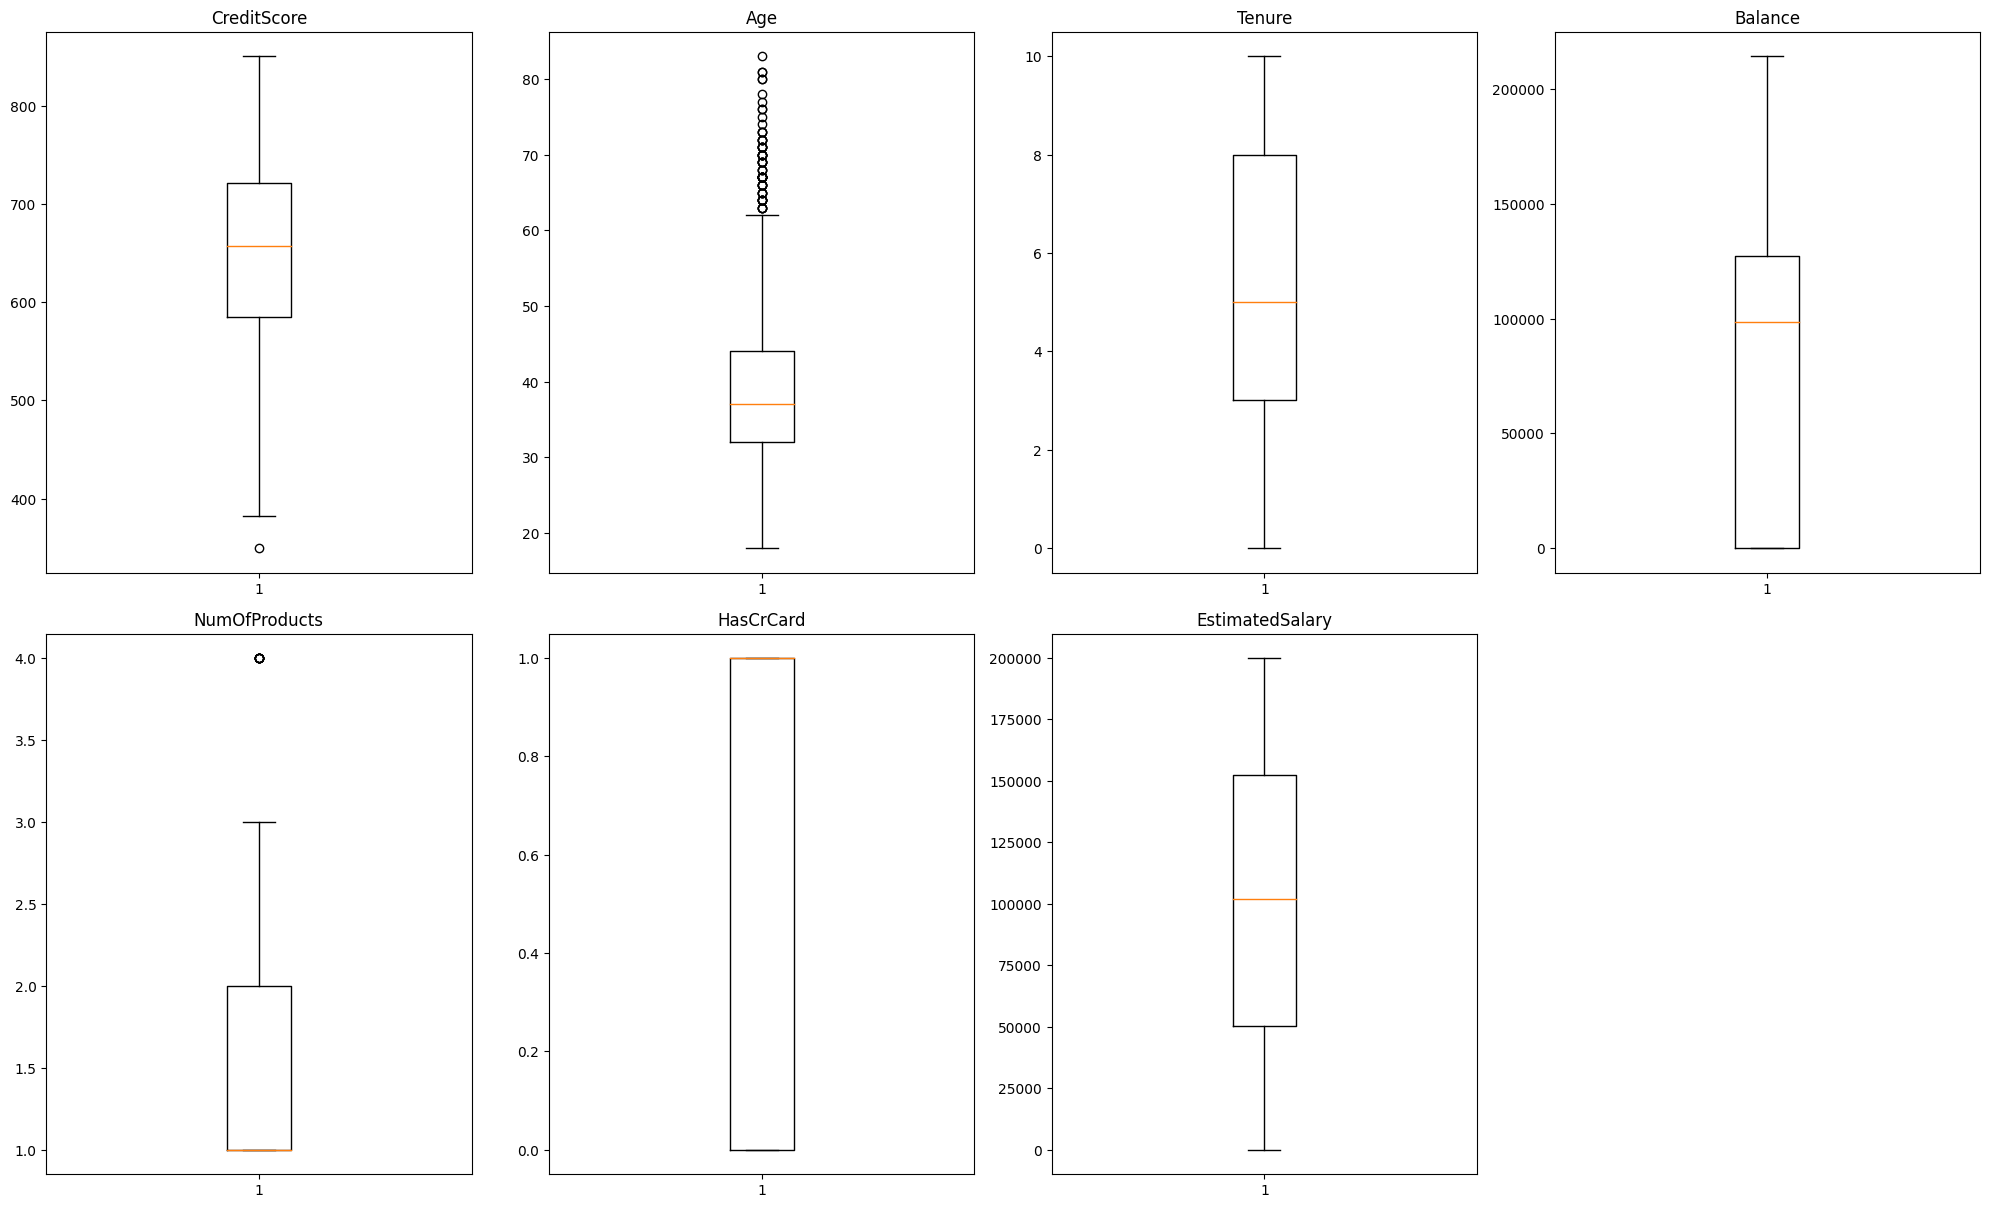

In [75]:
numerical_col = X_test.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_test[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

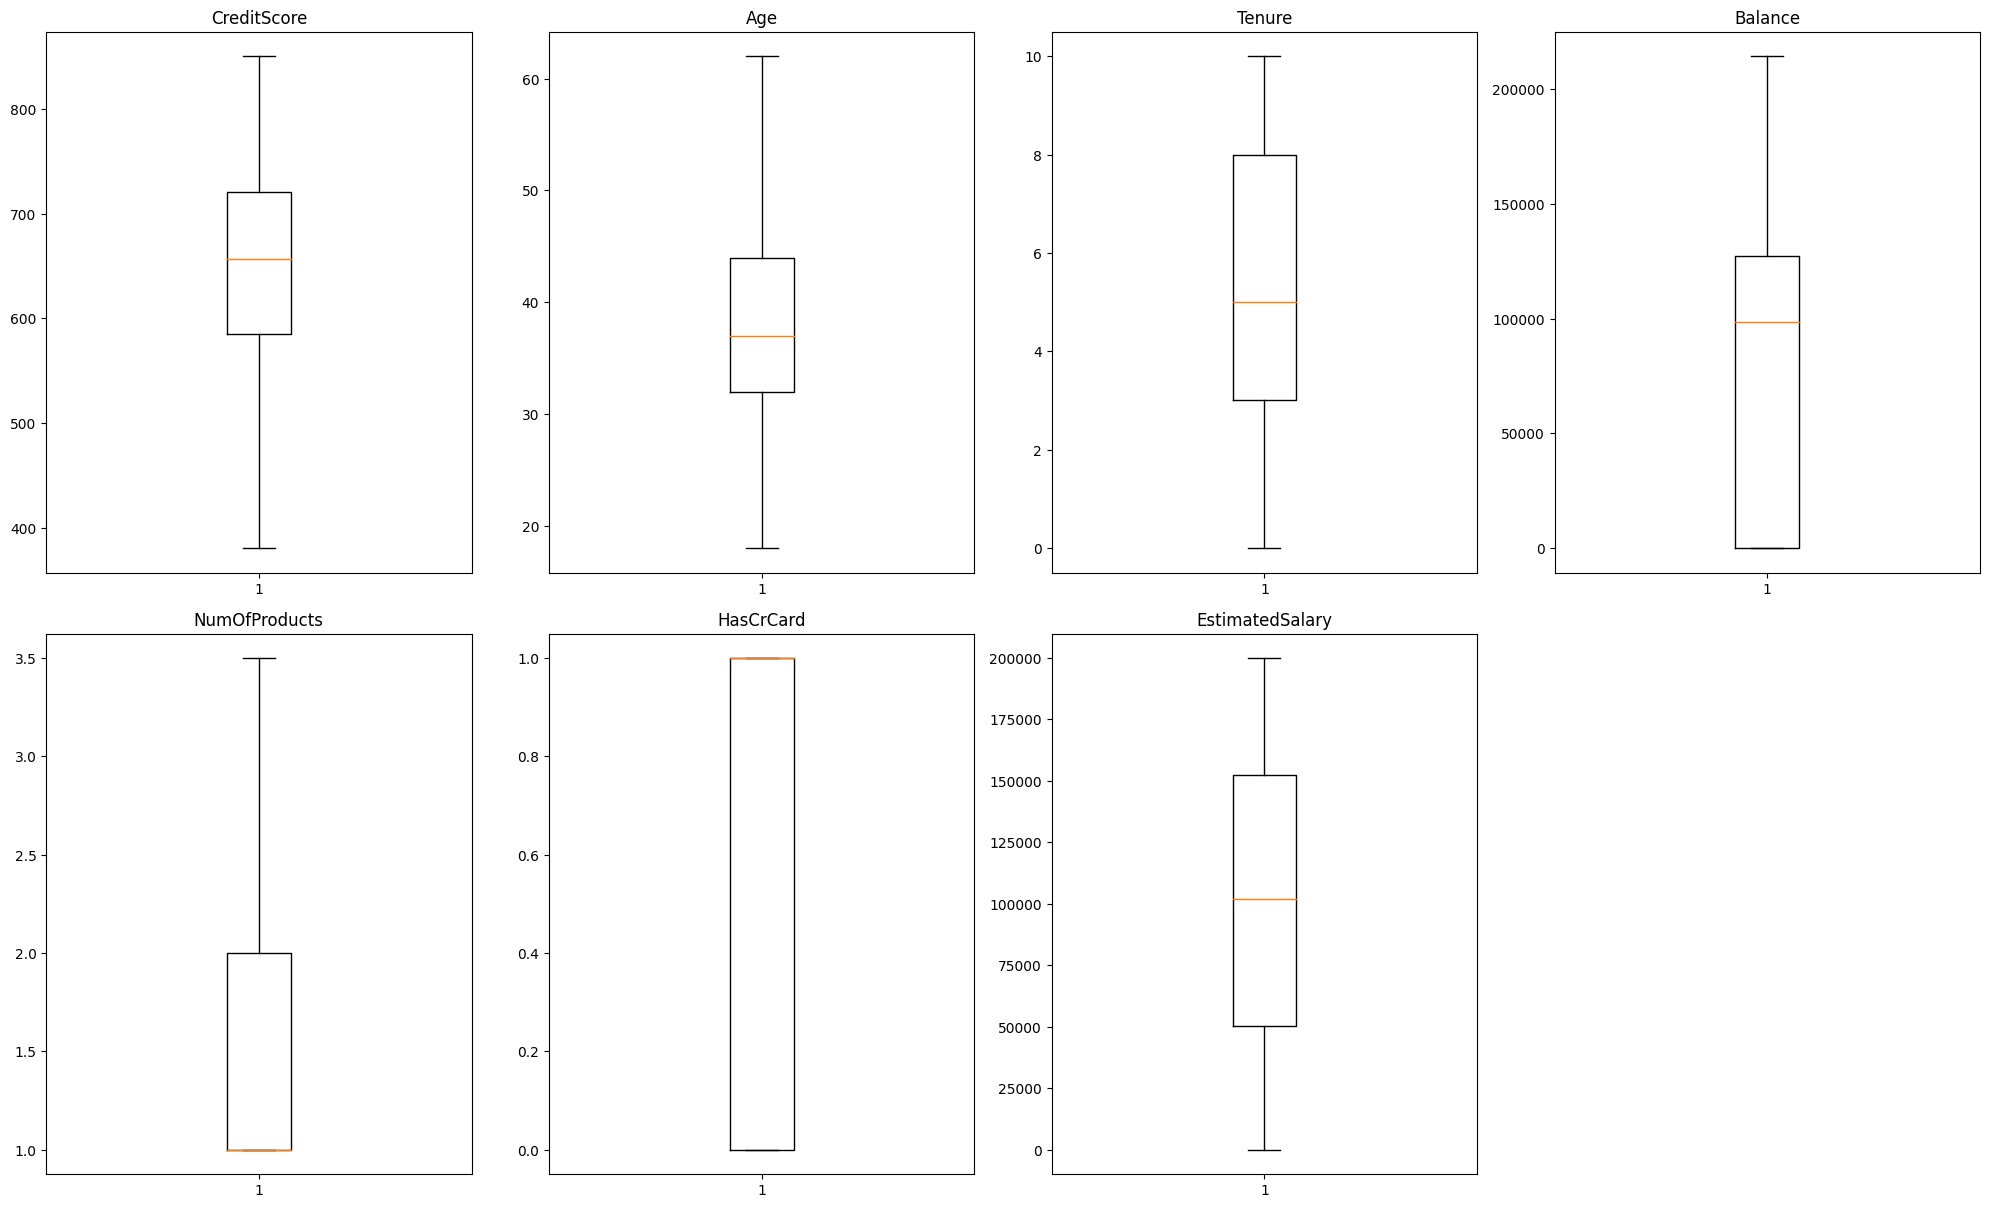

In [76]:
numerical_col = X_test.select_dtypes(include=np.number).columns.tolist()
X_val = treat_outliers_all(X_test, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_val[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers Fixed on X_Test Data Set

4.6 One Hot Encoding For Categorical Values On Training Data Set

In [77]:
X_train__one_hot_encoding = pd.get_dummies(X_train, drop_first=True)

In [78]:
X_train__one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   float64
 5   HasCrCard          8000 non-null   int64  
 6   EstimatedSalary    8000 non-null   float64
 7   Geography_Germany  8000 non-null   uint8  
 8   Geography_Spain    8000 non-null   uint8  
 9   Gender_Male        8000 non-null   uint8  
 10  IsActiveMember_1   8000 non-null   uint8  
 11  HasCrCard _1       8000 non-null   uint8  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 539.1 KB


In [79]:
X_train__one_hot_encoding

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard _1
4256,596,62,9,134208.25,1.0,1,13455.43,0,1,0,1,1
9151,614,49,1,0.00,2.0,1,192440.54,0,0,1,0,1
696,445,62,1,64119.38,1.0,1,76569.64,0,1,1,1,1
4898,544,40,7,0.00,1.0,0,161076.92,0,0,0,1,0
6427,746,37,2,0.00,2.0,1,143194.05,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5090,474,30,9,0.00,2.0,0,63158.22,0,0,0,0,0
9358,837,29,9,0.00,2.0,1,41866.26,0,0,0,1,1
9583,602,34,8,98382.72,1.0,1,39542.00,0,1,1,0,1
451,850,40,9,0.00,2.0,0,119232.33,0,0,1,1,0


In [80]:
X_train=X_train__one_hot_encoding

In [81]:
X_test__one_hot_encoding = pd.get_dummies(X_test, drop_first=True)

In [82]:
X_test__one_hot_encoding

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,HasCrCard _1
4466,413,35,2,0.00,2.0,1,60972.84,0,1,1,1,1
3754,535,35,8,118989.92,1.0,1,135536.72,0,1,1,1,1
9601,659,33,7,89939.62,1.0,1,136540.09,0,0,0,0,1
9758,556,43,4,125890.72,1.0,1,74854.97,1,0,0,1,1
8577,754,62,1,136186.44,1.0,1,121529.59,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,551,62,2,128410.71,2.0,1,181718.73,0,1,1,1,1
1650,625,34,6,0.00,2.0,0,197283.20,0,0,1,0,0
1276,635,37,5,113488.68,1.0,1,95611.74,1,0,1,0,1
1043,579,35,1,0.00,2.0,1,4460.20,0,0,1,0,1


In [83]:
X_test=X_test__one_hot_encoding

4.2 Scale Data Set

Scaling Data is important step for unsupervised learning  process to avoid the problem of one feature dominating over others due to unsupervised learning algorithm uses distance to find the similarity between data points.

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [84]:
sc = StandardScaler()


In [85]:
X_train_Scaled = pd.DataFrame(
    sc.fit_transform(X_train),
)


In [86]:
X_train_Scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.557541,2.382989,1.380964,0.925750,-0.928601,0.649397,-1.505216,-0.57812,1.737844,-1.095269,0.967285,0.649397
1,-0.371218,1.056207,-1.376312,-1.219862,0.821000,0.649397,1.614655,-0.57812,-0.575426,0.913017,-1.033822,0.649397
2,-2.120583,2.382989,-1.376312,-0.194773,-0.928601,0.649397,-0.405078,-0.57812,1.737844,0.913017,0.967285,0.649397
3,-1.095807,0.137666,0.691645,-1.219862,-0.928601,-1.539890,1.067959,-0.57812,-0.575426,-1.095269,0.967285,-1.539890
4,0.995149,-0.168514,-1.031652,-1.219862,0.821000,0.649397,0.756245,-0.57812,-0.575426,0.913017,-1.033822,0.649397


In [87]:
X_test_Scaled = pd.DataFrame(
    sc.fit_transform(X_test),
)


In [88]:
X_test_Scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.495465,-0.387968,-1.083480,-1.250284,0.863835,0.632898,-0.693331,-0.581199,1.762605,0.910029,0.982159,0.632898
1,-1.228784,-0.387968,1.019684,0.676315,-0.909954,0.632898,0.591288,-0.581199,1.762605,0.910029,0.982159,0.632898
2,0.058662,-0.597709,0.669157,0.205954,-0.909954,0.632898,0.608574,-0.581199,-0.567342,-1.098866,-1.018165,0.632898
3,-1.010749,0.450995,-0.382425,0.788048,-0.909954,0.632898,-0.454164,1.720580,-0.567342,-1.098866,0.982159,0.632898
4,1.045012,2.443534,-1.434008,0.954749,-0.909954,0.632898,0.349967,1.720580,-0.567342,0.910029,0.982159,0.632898
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.062662,2.443534,-1.083480,0.828850,0.863835,0.632898,1.386932,-0.581199,1.762605,0.910029,0.982159,0.632898
1996,-0.294348,-0.492839,0.318629,-1.250284,0.863835,-1.580033,1.655083,-0.581199,-0.567342,0.910029,-1.018165,-1.580033
1997,-0.190521,-0.178227,-0.031898,0.587243,-0.909954,0.632898,-0.096557,1.720580,-0.567342,0.910029,-1.018165,0.632898
1998,-0.771948,-0.387968,-1.434008,-1.250284,0.863835,0.632898,-1.666956,-0.581199,-0.567342,0.910029,-1.018165,0.632898


In [89]:
X_train=X_train_Scaled

In [90]:
X_test=X_test_Scaled

##5-MODEL BUILDING

In this model predicting the customers who are willing to leave the bank is improtant since it may cause a financial impact for the bank.

`RECALL` Metric important in this model based on False Negatives. If the model predicts the customers who are willing to leave as NOT ; this may cause a financial impact for the bank.

So, I will take consideration of **RECALL** score to capture False Negative impact for the bank rather than **Precision** (Operational Costs)

##5.1-MODEL(1)

In [113]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [114]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1], units=64))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32,kernel_initializer='he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))

Initiating the model with SGD Optimizer and learning_rate of 1e-3

In [115]:
optprm = keras.optimizers.SGD(learning_rate=1e-3)

In [116]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer=optprm, loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


64- 32 Hidden layers exits at model

In [118]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=20,
          batch_size=32,verbose=1)

Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 0.6263 - accuracy: 0.6938 - val_loss: 0.5848 - val_accuracy: 0.7225
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5809 - accuracy: 0.7461 - val_loss: 0.5601 - val_accuracy: 0.7544
Epoch 3/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5584 - accuracy: 0.7633 - val_loss: 0.5437 - val_accuracy: 0.7700
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.7759 - val_loss: 0.5305 - val_accuracy: 0.7719
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5296 - accuracy: 0.7852 - val_loss: 0.5194 - val_accuracy: 0.7763
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 0.7891 - val_loss: 0.5098 - val_accuracy: 0.7806
Epoch 7/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5097 - accuracy: 0.7931 - val_loss: 0.5017 - val_accuracy: 0.7812
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8100


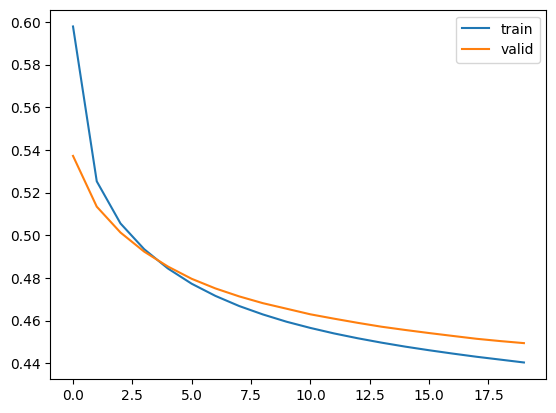

In [103]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1.evaluate(X_test, y_test)

Between EPOC 0 and 10 Validation and Test data goes paralel but than noice increases on Validation data set

In [104]:
y_pred=model1.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [105]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

In [111]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

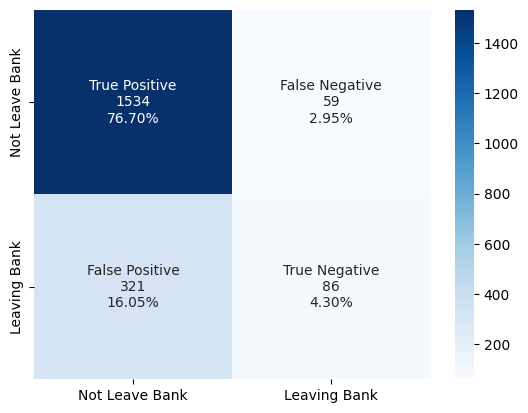

In [106]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Leave Bank','Leaving Bank']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [107]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.59      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



`RECALL` of prediction is not good which is 0.21 , lets check with ROC Curve

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.224873, G-Mean=0.696


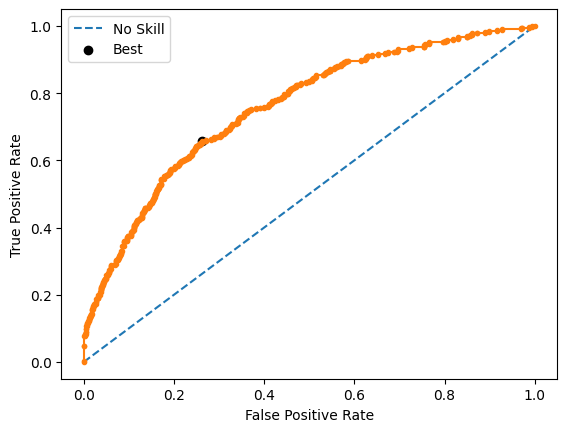

In [108]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

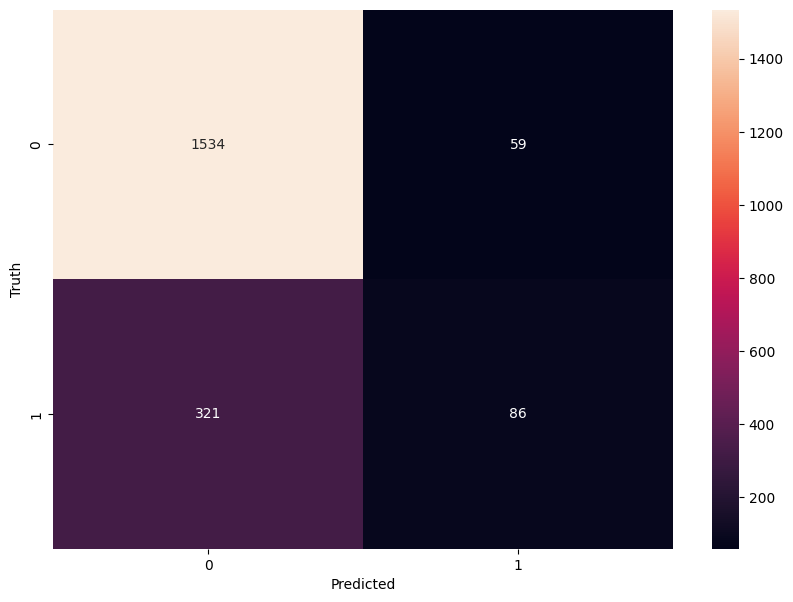

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

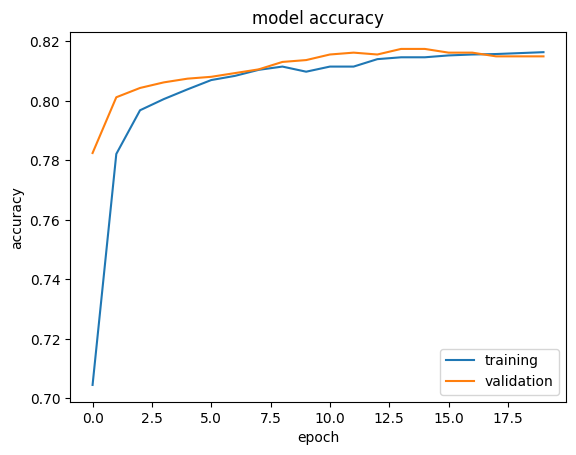

In [110]:
loss, accuracy  = model1.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

##5.2-MODEL(2)

In [149]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [150]:
model2 = Sequential()
      #Adding the hidden and output layers
model2.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [151]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,593
Trainable params: 46,593
Non-trainable params: 0
_________________________________________________________________


In [153]:
history2 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4289 - accuracy: 0.8128 - val_loss: 0.4356 - val_accuracy: 0.8087
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4284 - accuracy: 0.8133 - val_loss: 0.4352 - val_accuracy: 0.8081
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4280 - accuracy: 0.8141 - val_loss: 0.4348 - val_accuracy: 0.8075
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4275 - accuracy: 0.8138 - val_loss: 0.4343 - val_accuracy: 0.8087
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4270 - accuracy: 0.8147 - val_loss: 0.4339 - val_accuracy: 0.8087
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4266 - accuracy: 0.8152 - val_loss: 0.4335 - val_accuracy: 0.8094
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8159 - val_loss: 0.4331 - val_accuracy: 0.8094
Epoch 

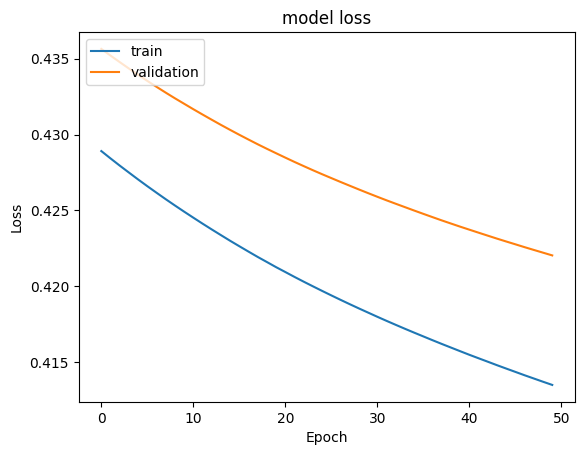

In [154]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.218865, G-Mean=0.715


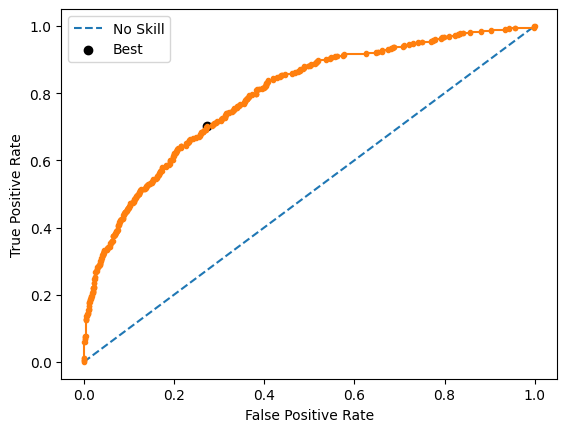

In [156]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [157]:
#Predicting the results using best as a threshold
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds1[ix])
y_pred_e2

63/63 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

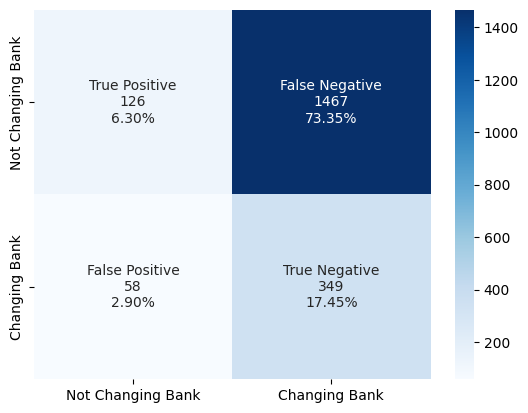

In [159]:
#Calculating the confusion matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [160]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e2)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.08      0.14      1593
           1       0.19      0.86      0.31       407

    accuracy                           0.24      2000
   macro avg       0.44      0.47      0.23      2000
weighted avg       0.58      0.24      0.18      2000

